In [2]:
#install specific version of libraries used in lab
! mamba install pandas==1.3.3-y
! mamba install numpy=1.21.2-y
! mamba install sklearn=0.20.1-y

zsh:1: command not found: mamba
zsh:1: command not found: mamba
zsh:1: command not found: mamba


In [3]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import urllib.request

In [5]:
def download(url, filename):
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}")

In [9]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

download(file_path, "usedcars.csv")
file_name="usedcars.csv"

Downloaded usedcars.csv


In [10]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linera Regression and Multiple Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
lm

LinearRegression()

In [13]:
X = df[['highway-mpg']]
Y = df['price']

In [14]:
lm.fit(X,Y)

LinearRegression()

In [15]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [16]:
lm.intercept_

np.float64(38423.305858157415)

In [17]:
lm.coef_

array([-821.73337832])

#### Q1: Create a linear regression object called "lm1"

In [18]:
lm1 = LinearRegression()
lm1

LinearRegression()

Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [19]:
X1 = df[['engine-size']]
Y1 = df['price']
lm1.fit(X1,Y1)

LinearRegression()

Find the slope and intercept of the model.

In [21]:
# slope
lm1.coef_


array([166.86001569])

In [22]:
# intercept
lm1.intercept_

np.float64(-7963.338906281046)

What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [23]:
Yhat = -7963 + 166.86*X1
Price = -7963 + 166.86*df['engine-size'] 

In [24]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:
lm.fit(Z, df['price'])

LinearRegression()

In [26]:
lm.intercept_

np.float64(-15806.624626329245)

In [27]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### 2. Model Evaluation Using Visualization

In [28]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48166.61216522409)

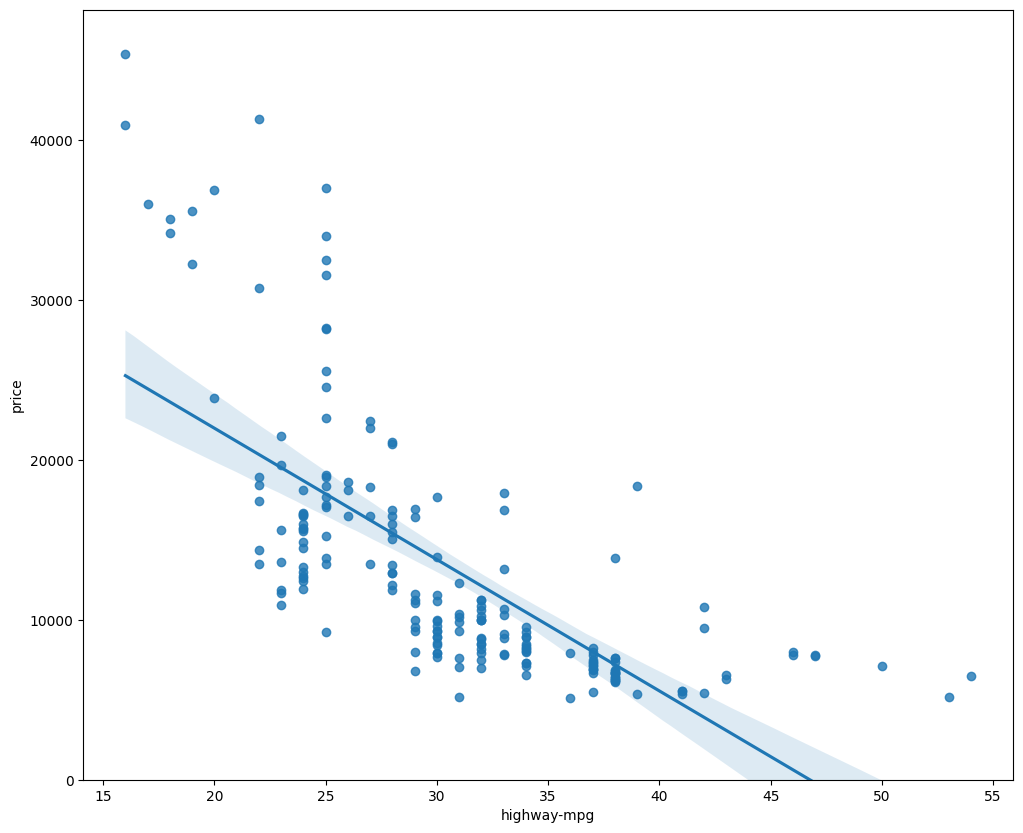

In [29]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

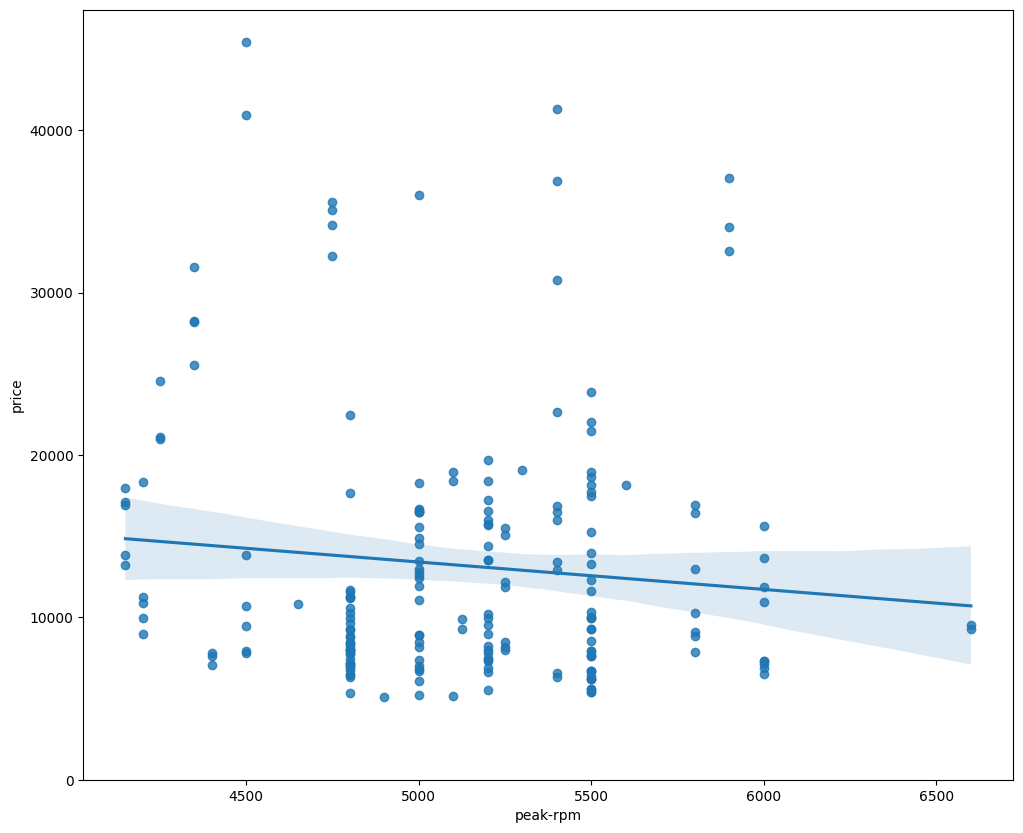

In [30]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Q3: Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [31]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


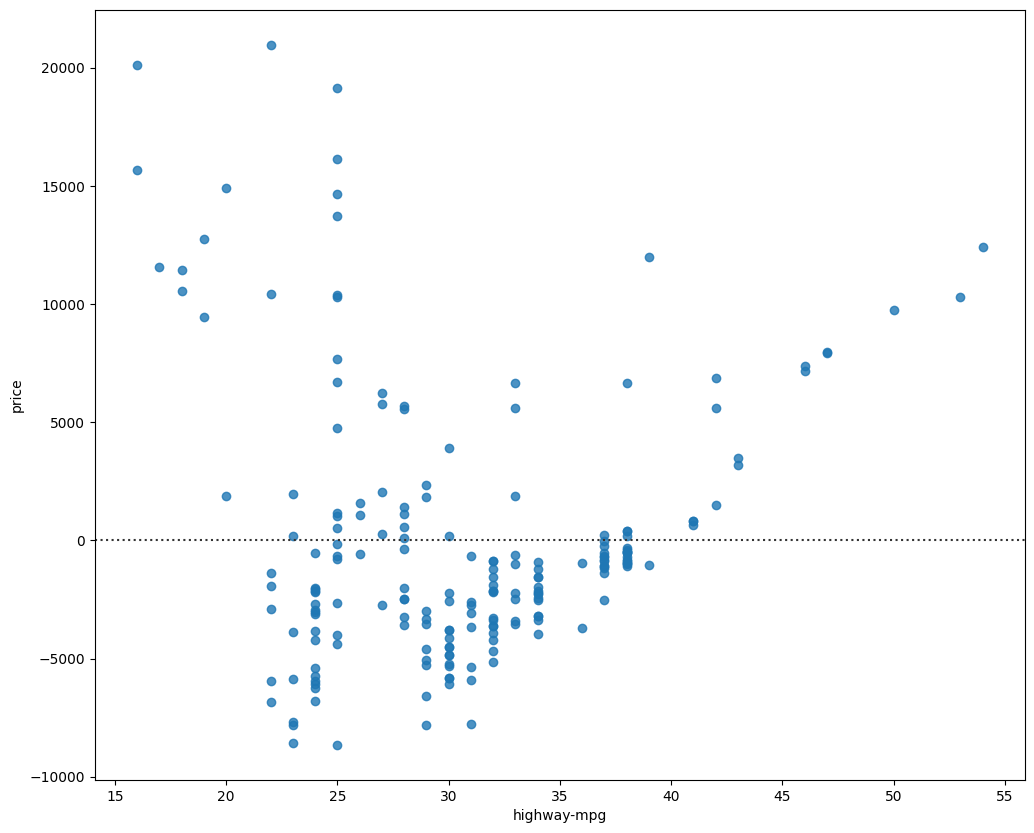

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [33]:
Y_hat = lm.predict(Z)

/var/folders/w8/y5p4xcp13lj7dn30321z3yvw0000gn/T/ipykernel_98392/4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/var/folders/w8/y5p4xcp13lj7dn30321z3yvw0000gn/T/ipykernel_98392/4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

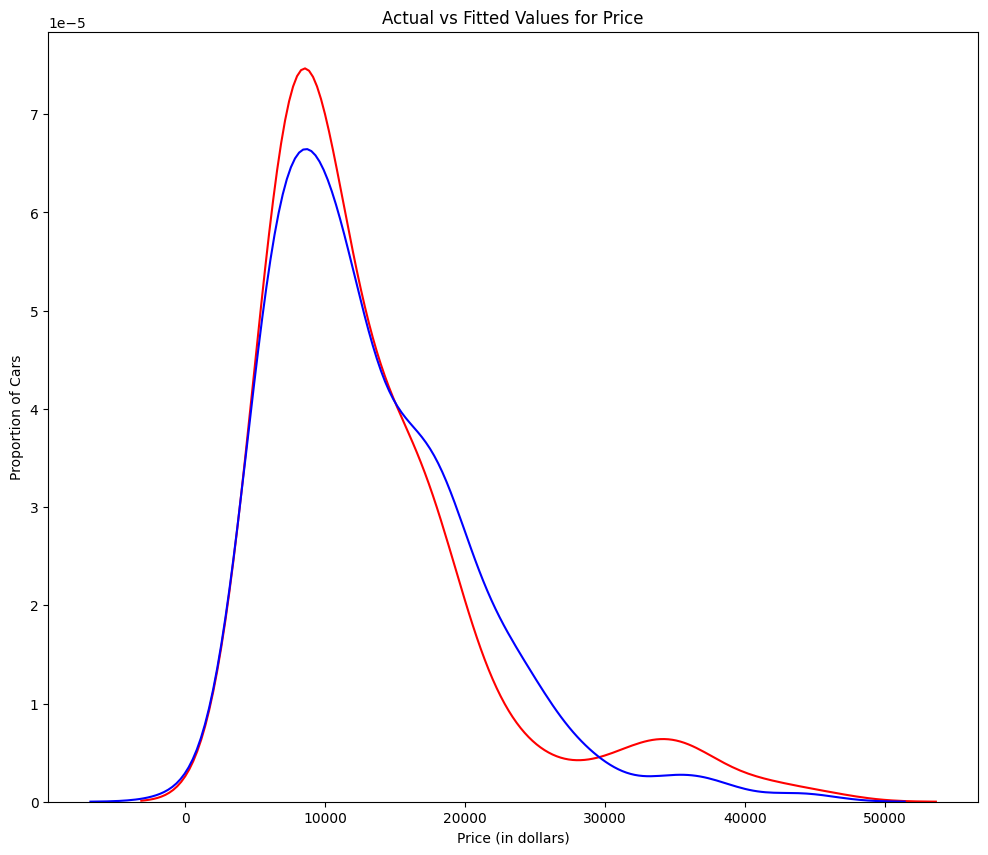

In [34]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [35]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [36]:
x = df['highway-mpg']
y = df['price']

In [37]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


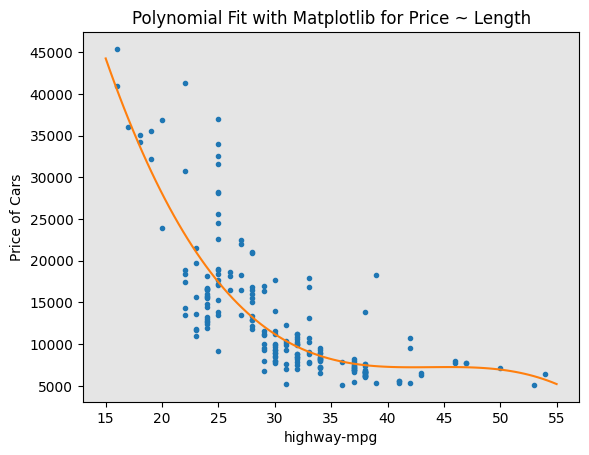

In [38]:
PlotPolly(p, x, y, 'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### Q4: Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


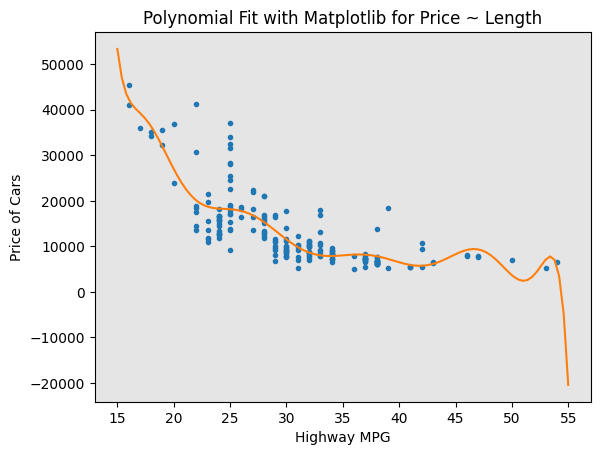

In [40]:
# Here we use a polynomial of the 11th order 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [43]:
Z_pr=pr.fit_transform(Z)

In [44]:
Z.shape

(201, 4)

In [45]:
Z_pr.shape

(201, 15)

### Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [48]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [50]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Q5: Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [52]:
Input = [('scale',StandardScaler()),('moel',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [53]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [54]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [57]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [58]:
Y_predict_multifit = lm.predict(Z)

In [59]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [60]:
from sklearn.metrics import r2_score

In [61]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906514


In [62]:
mean_squared_error(df['price'], p(x))

20474146.426361248

In [63]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [64]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [65]:
lm.fit(X, Y)
lm

LinearRegression()

In [66]:
yhat=lm.predict(new_input)
yhat[0:5]

/Users/fran/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

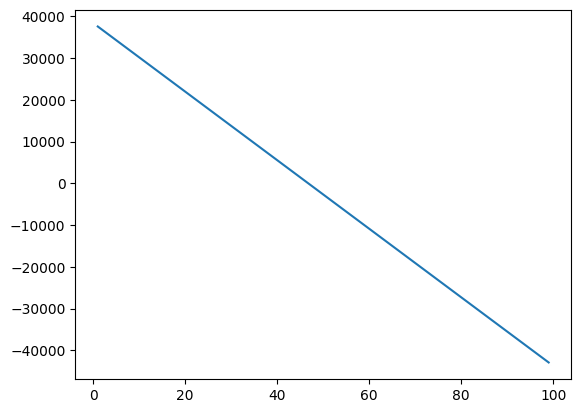

In [67]:
plt.plot(new_input, yhat)
plt.show()